# Análise de dados

Dados do dataset:
https://www.kaggle.com/code/ygorcarlos/students-performance-eda-en-and-pt-br/input

# Importando um dataset

Prompt para o chatgpt:

Quero que você atue como um cientista de dados e codifique para mim.
Estou desenvolvendo um projeto de análise de performance de estudantes em um curso.
Tenho o endereço do dataset no formato csv armazenado na pasta do projeto do google colab . Escreva o código em Python para importar os dados.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('exams.csv')

# Explorando os dados

Os dados foram carregados e armazenados na variável "df".
Escreva o código para exploração de dados para que os resultados sejam exibidos sem a necessidade de usar a função `print()`.
Adicione um comentário em cada código para saber do que se trata.

In [ ]:
# Mostrar informações sobre as colunas e os tipos de dados
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   race_ethnicity           1000 non-null   object
 2   education                1000 non-null   object
 3   lunch                    1000 non-null   object
 4   test_preparation_course  1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Mostrar estatísticas descritivas para as colunas numéricas
df.describe()



,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [ ]:
# Exibir as primeiras 5 linhas do DataFrame
df.head()



,gender,race_ethnicity,education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [ ]:
# Verificar se há valores nulos em cada coluna
df.isnull().sum()


gender                     0
race_ethnicity             0
education                  0
lunch                      0
test_preparation_course    0
math_score                 0
reading_score              0
writing_score              0
dtype: int64

In [ ]:

# Contar o número de valores únicos em cada coluna
df.nunique()

gender                      2
race_ethnicity              5
education                   6
lunch                       2
test_preparation_course     2
math_score                 77
reading_score              73
writing_score              76
dtype: int64

# Entendendo as variáveis

Me ajude a entender cada uma das variáveis que temos no dataset:
"gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"

# Visualizando os dados

Neste dataset temos:
- Colunas com valores numéricos:
"math score","reading score","writing score"
- Colunas com dados categóricos:
"gender","race/ethnicity","parental level of education","lunch","test preparation course"
Crie códigos em Python com a biblioteca Seaborn para visualizar
a distribuição dos dados numéricos e para visualizar as quantidades dos dados categóricos.
Quero visualizar os gráficos em relação à variável "test preparation course",
usando cores diferentes para as categorias "Completed" e "none".

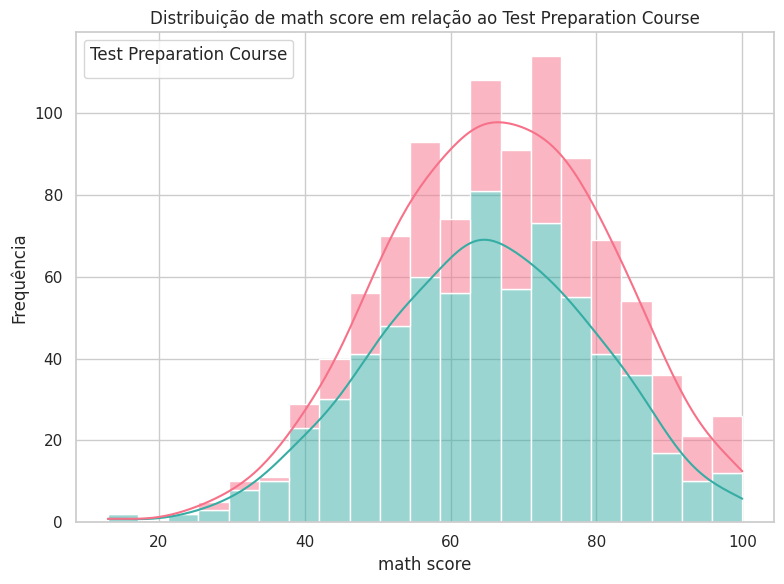

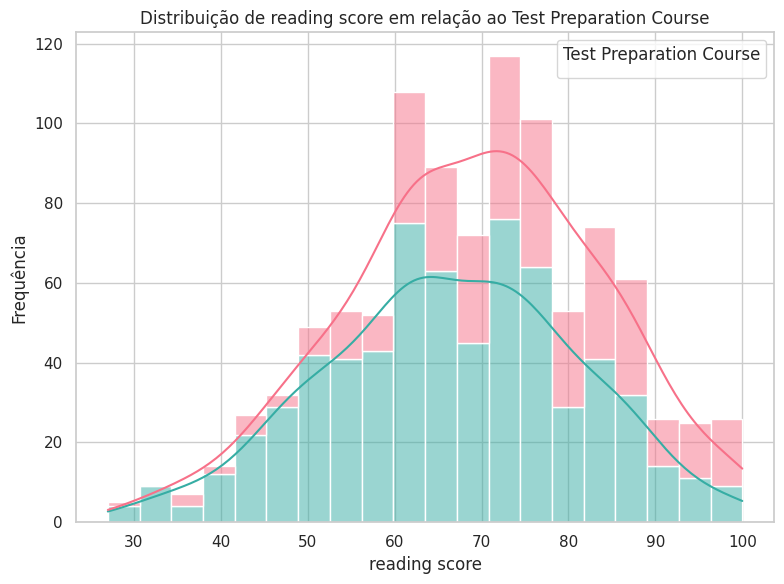

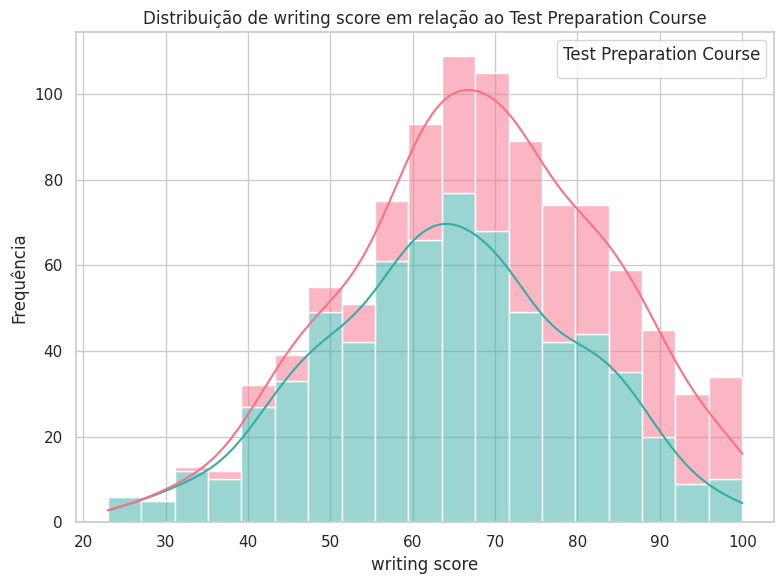

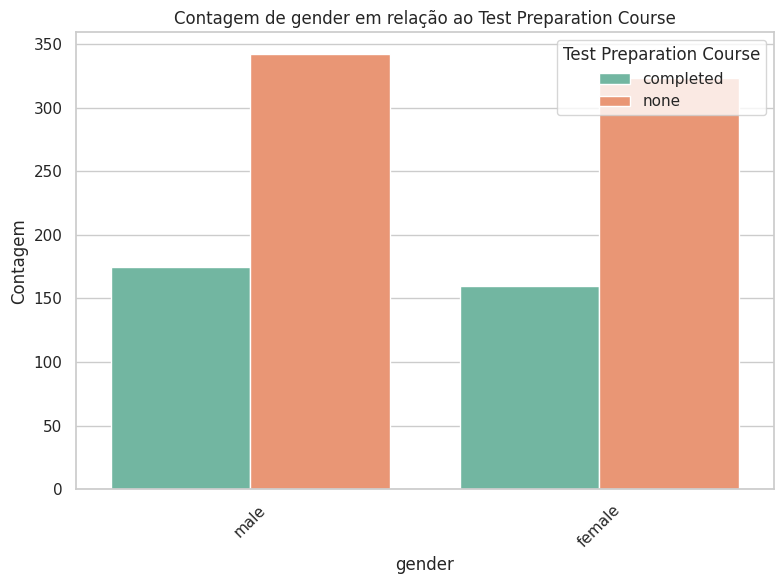

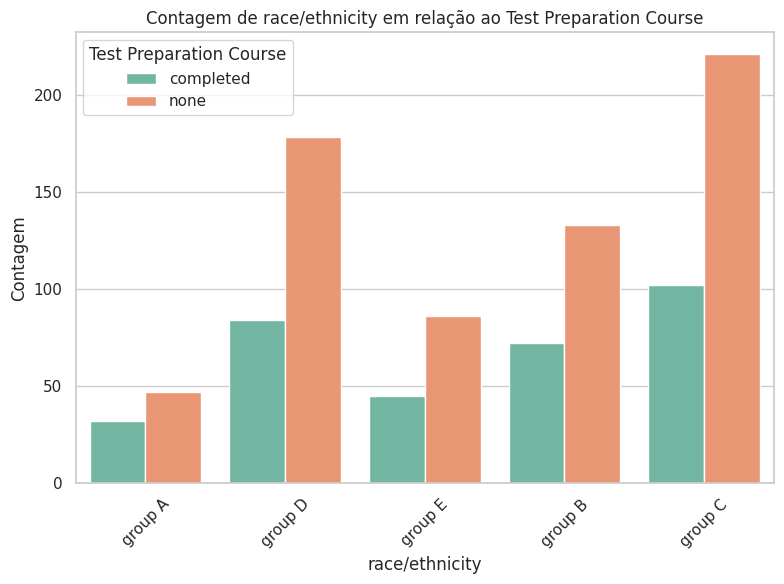

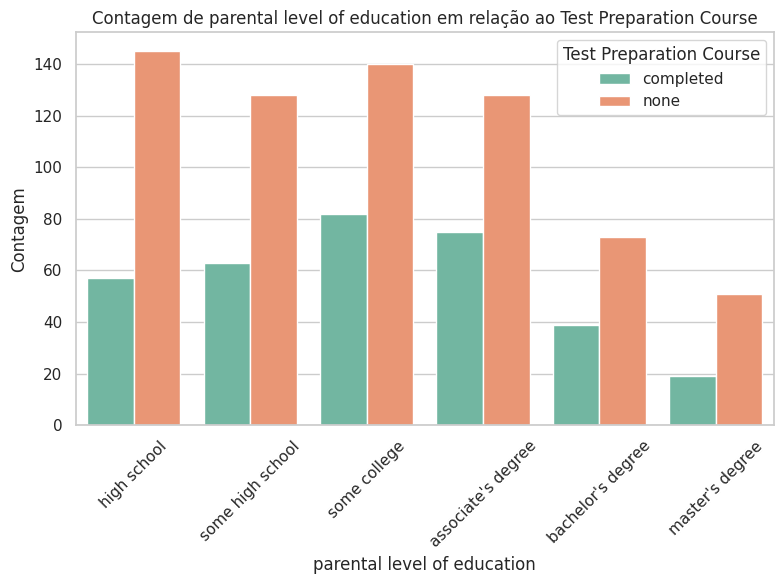

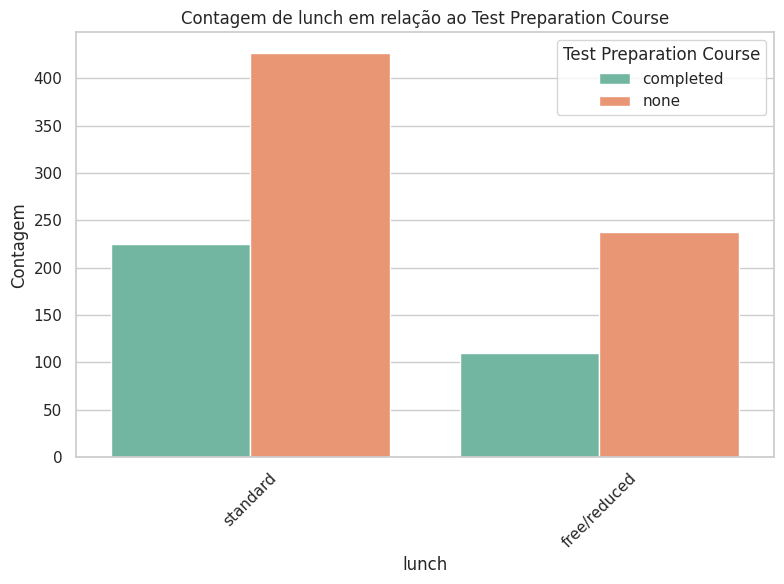

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualização da distribuição dos dados numéricos
scores = ['math score', 'reading score', 'writing score']
for score in scores:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=score, hue='test preparation course', kde=True, palette='husl', multiple='stack')
    plt.title(f'Distribuição de {score} em relação ao Test Preparation Course')
    plt.xlabel(score)
    plt.ylabel('Frequência')
    plt.legend(title='Test Preparation Course')
    plt.tight_layout()
    plt.show()

# Visualização das quantidades dos dados categóricos em relação ao Test Preparation Course
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='test preparation course', palette='Set2')
    plt.title(f'Contagem de {col} em relação ao Test Preparation Course')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.legend(title='Test Preparation Course')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



# Limpando o código

Alguma dessas colunas: "gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score" é desnecessária para criar um modelo de Machine Learning?

# Correlação de valores numéricos

Crie um código para avaliar a problemas de alta correlação entre os campos: "math score","reading score","writing score"


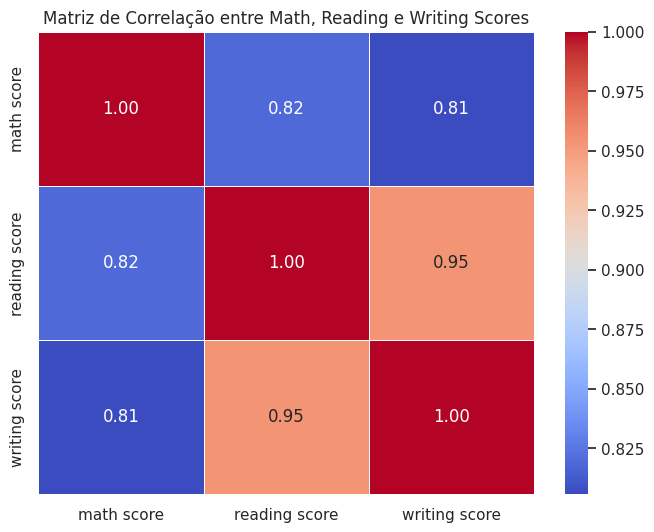

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas de interesse
scores_subset = df[['math score', 'reading score', 'writing score']]

# Calcular a matriz de correlação entre essas colunas
correlation_matrix = scores_subset.corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Math, Reading e Writing Scores')
plt.show()



# Correlação entre dados categóricos

Crie um código para avaliar a correlação entre os dados categóricos: "gender","race/ethnicity","parental level of education","lunch","test preparation course

In [ ]:
import pandas as pd

# Selecionar as colunas categóricas de interesse
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
categorical_subset = df[categorical_cols]

# Criar tabelas de contingência para todas as combinações possíveis de pares de variáveis
for col1 in categorical_subset.columns:
    for col2 in categorical_subset.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(categorical_subset[col1], categorical_subset[col2])
            print(f"Contingency table between '{col1}' and '{col2}':")
            print(contingency_table)
            print("\n")


Contingency table between 'gender' and 'race/ethnicity':
race/ethnicity  group A  group B  group C  group D  group E
gender                                                     
female               37      114      154      126       52
male                 42       91      169      136       79


Contingency table between 'gender' and 'parental level of education':
parental level of education  associate's degree  bachelor's degree  \
gender                                                               
female                                       81                 58   
male                                        122                 54   

parental level of education  high school  master's degree  some college  \
gender                                                                    
female                                94               42           100   
male                                 108               28           122   

parental level of education  some high school  
g

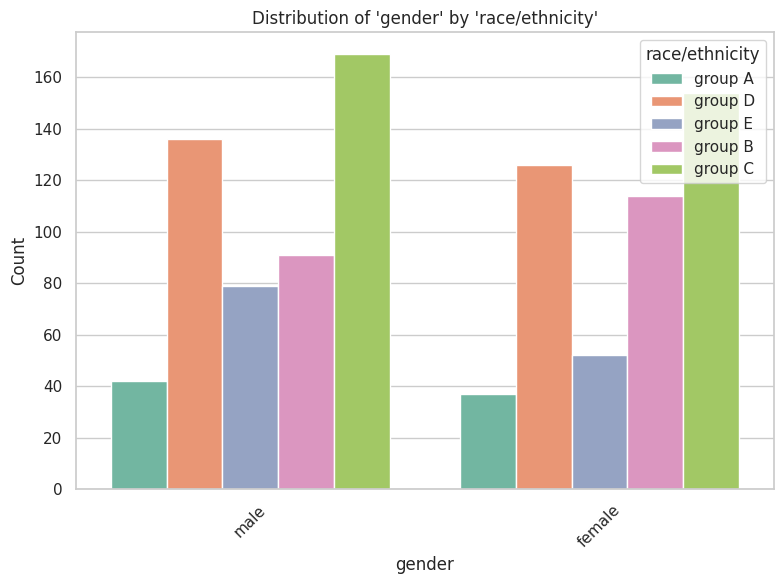

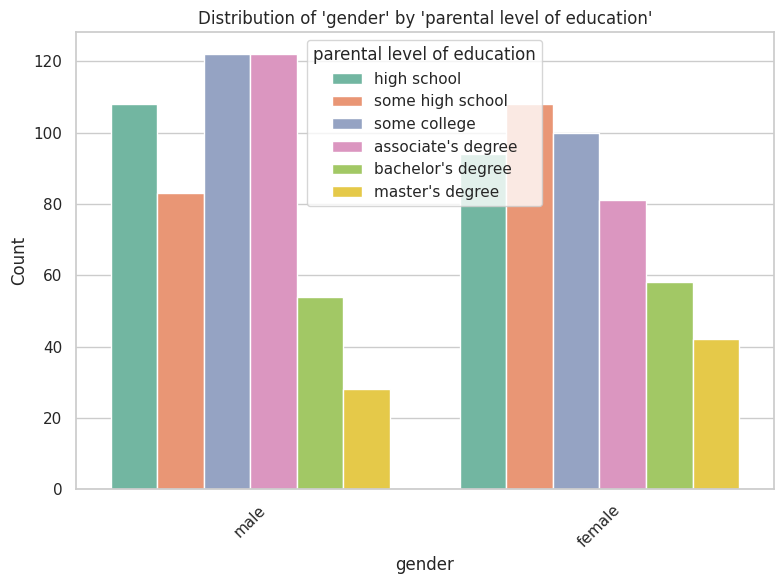

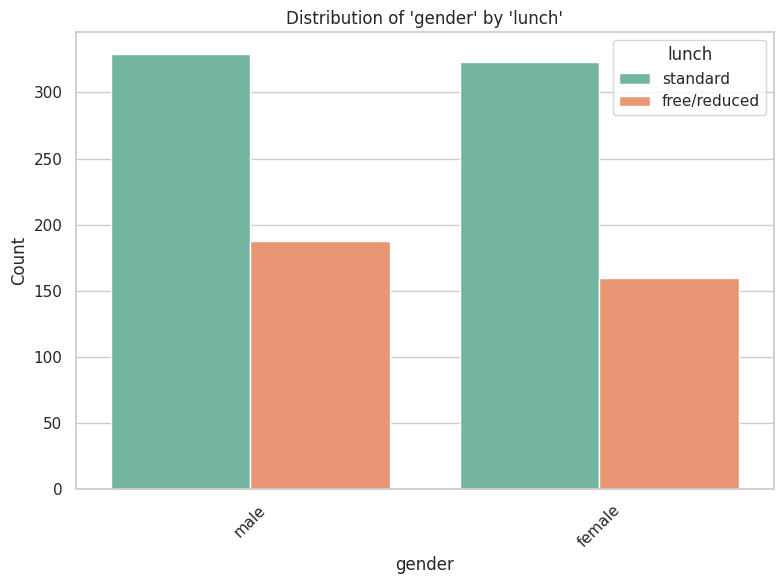

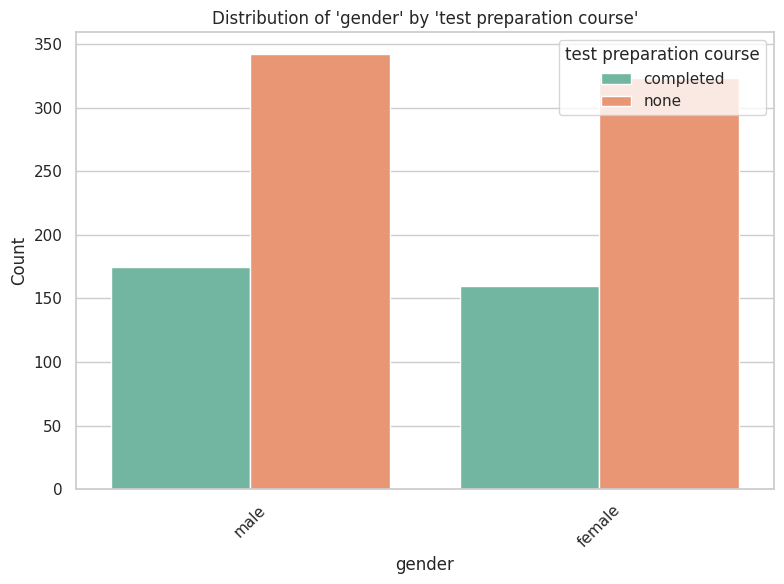

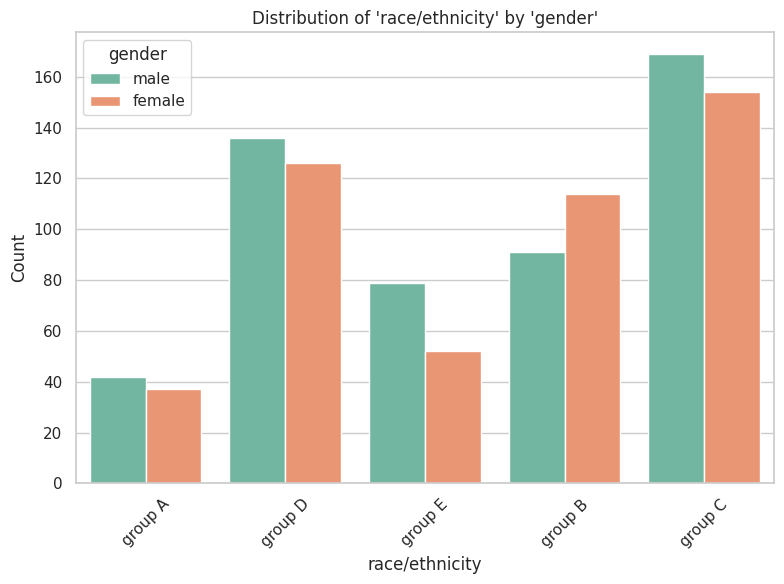

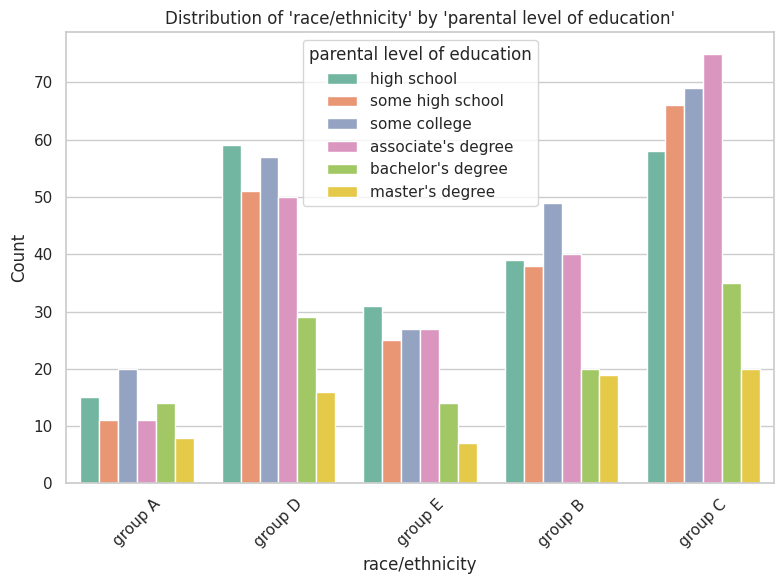

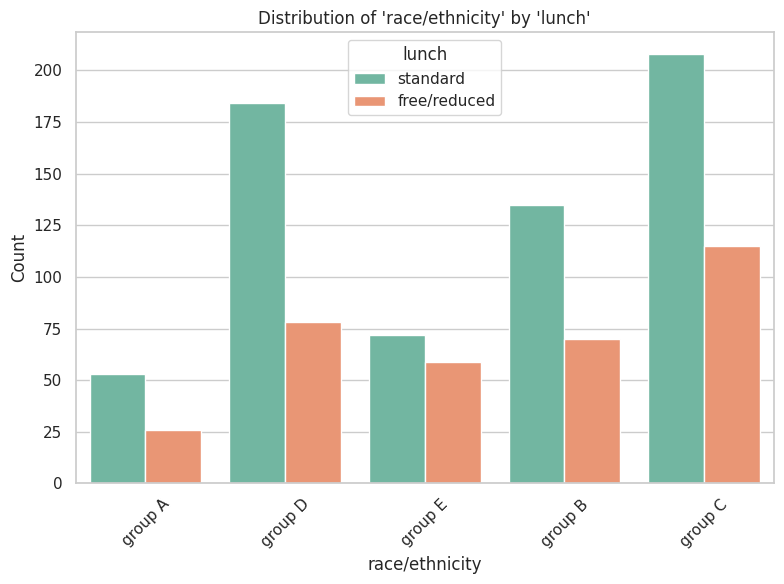

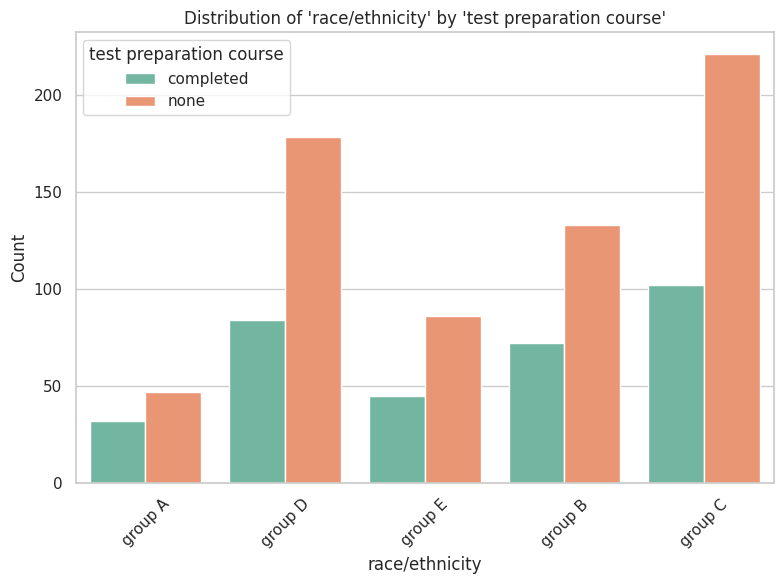

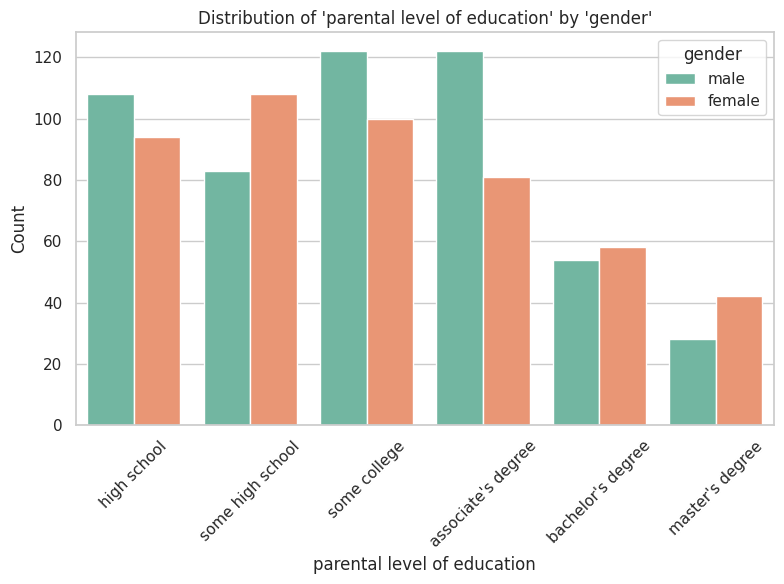

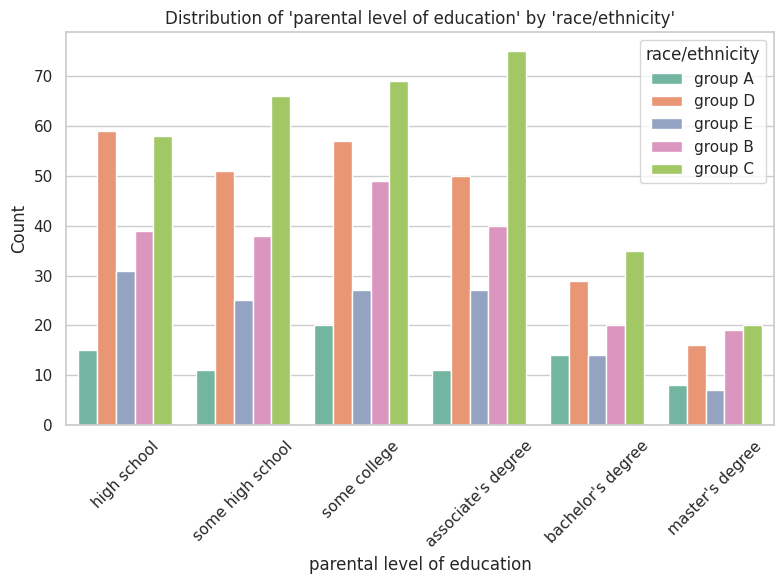

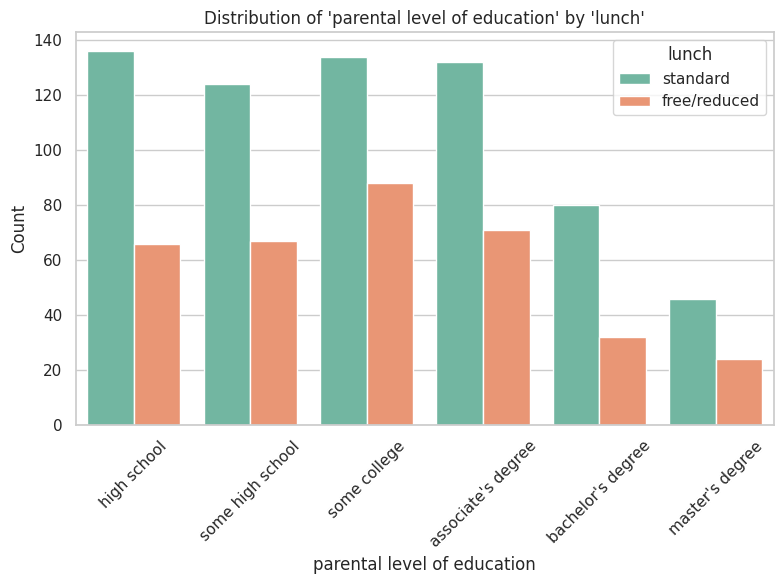

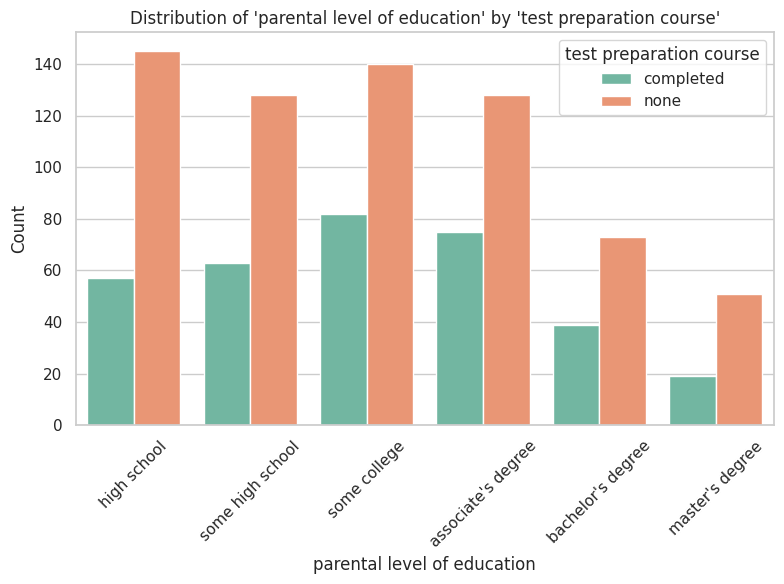

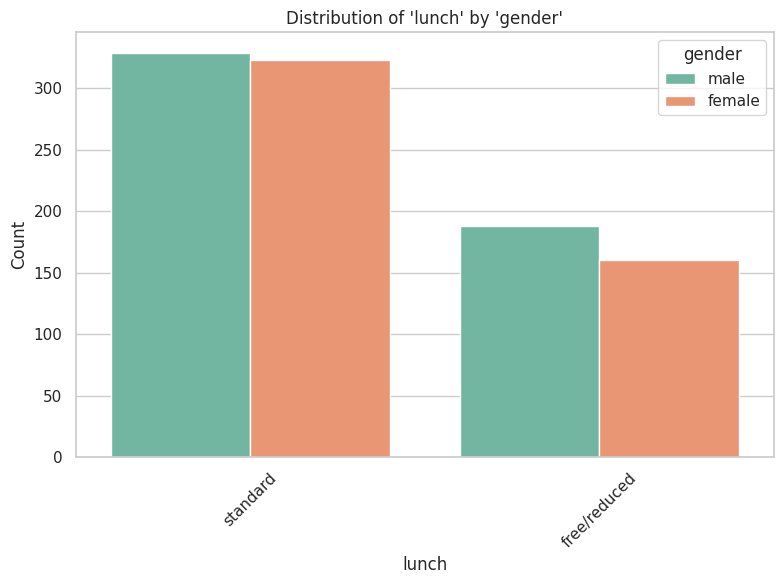

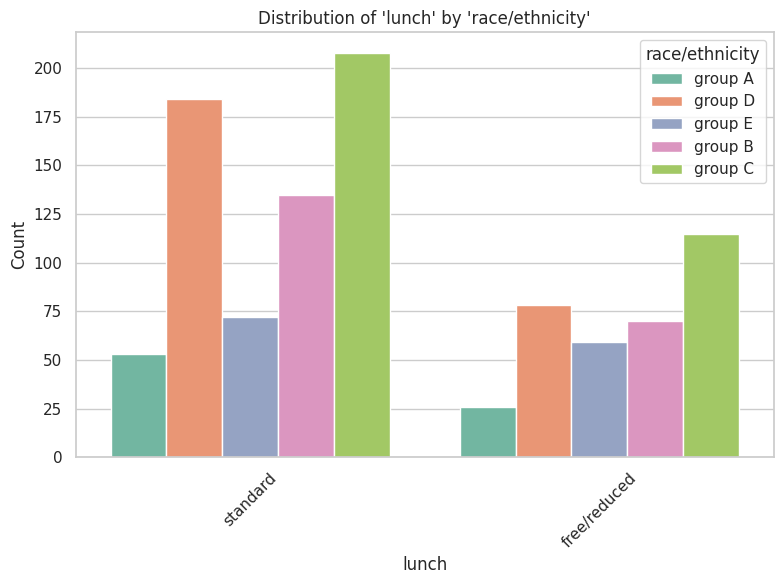

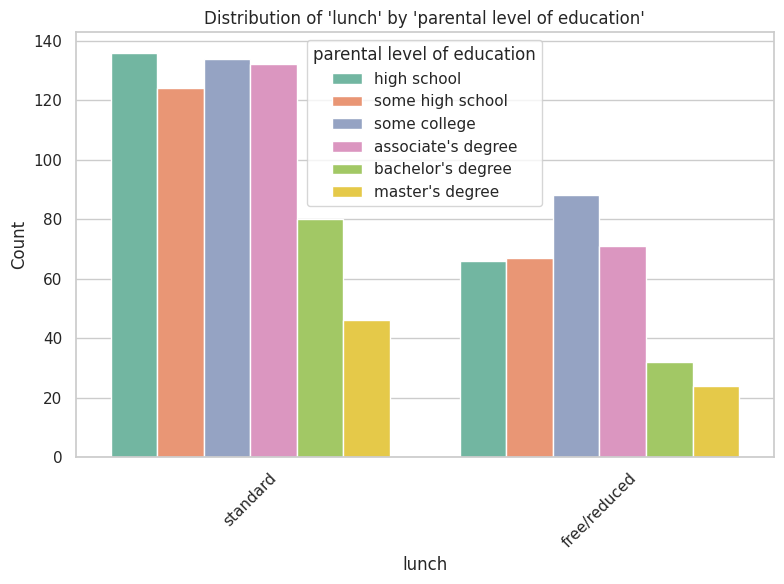

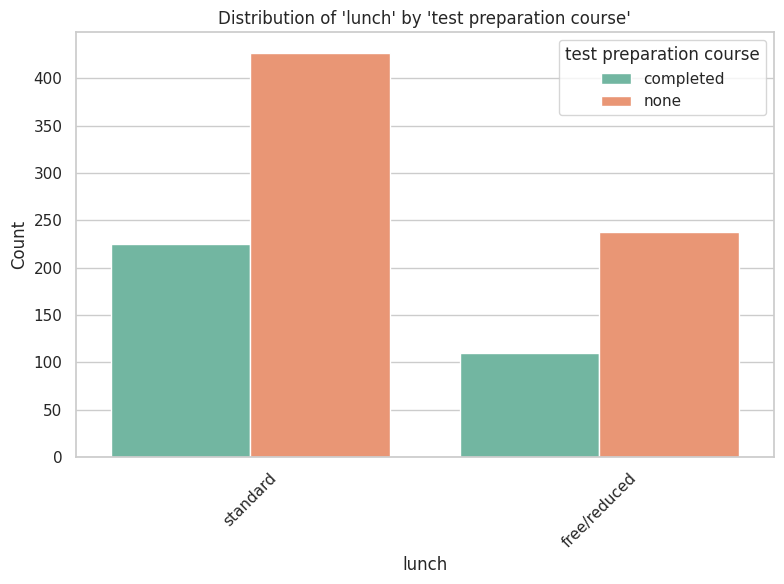

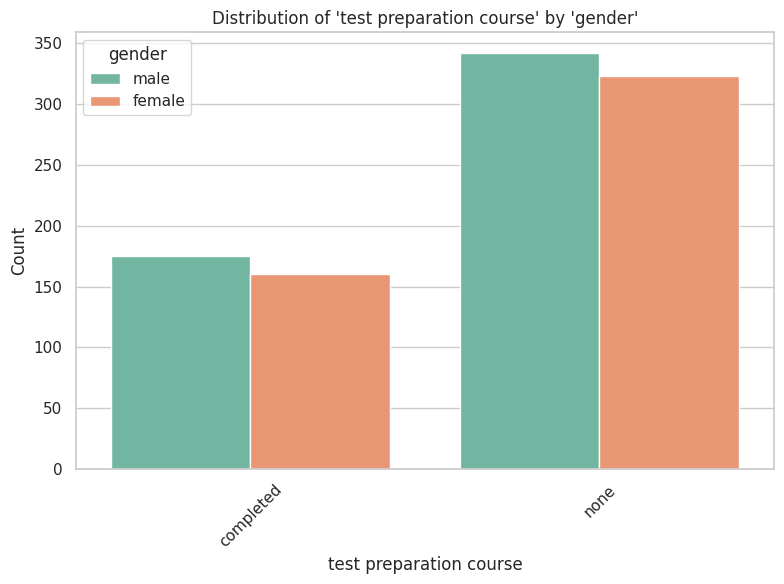

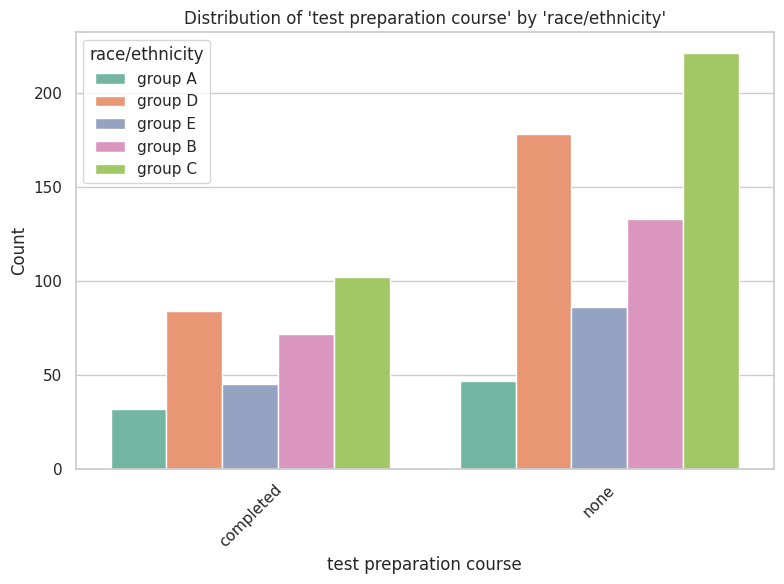

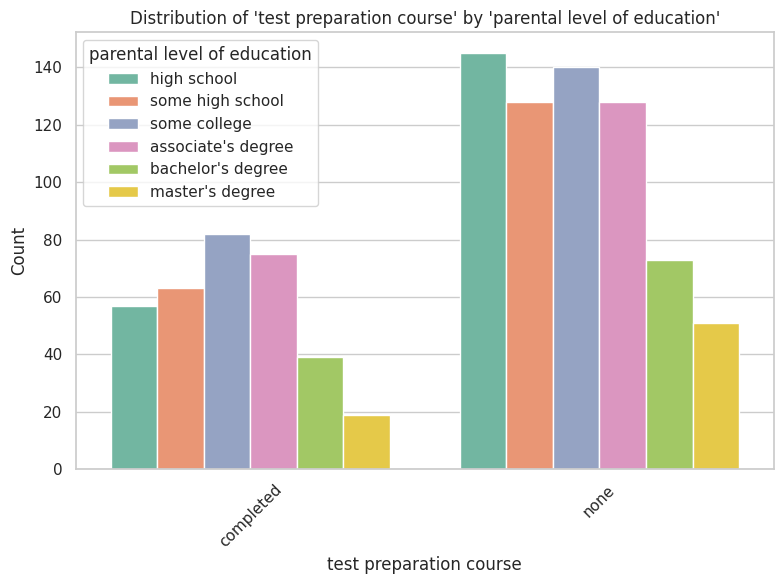

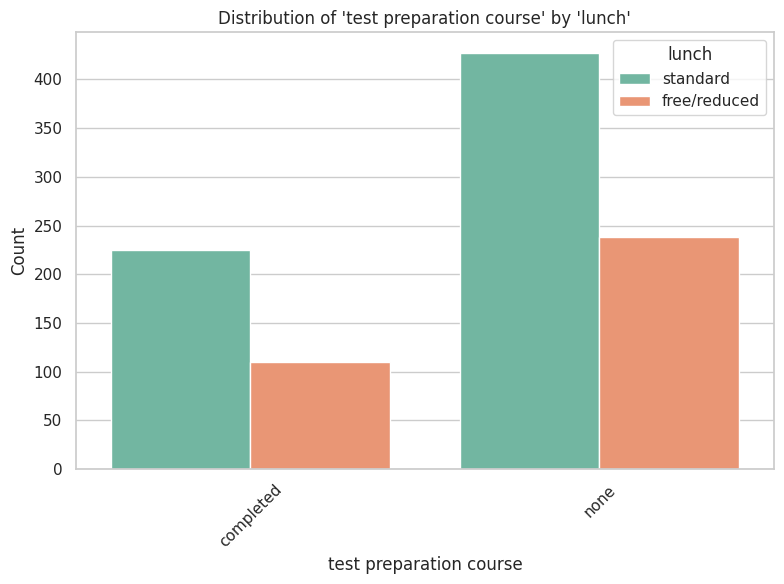

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar gráficos de barras empilhadas para cada par de variáveis categóricas
for col1 in categorical_subset.columns:
    for col2 in categorical_subset.columns:
        if col1 != col2:
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=col1, hue=col2, palette='Set2')
            plt.title(f"Distribution of '{col1}' by '{col2}'")
            plt.xlabel(col1)
            plt.ylabel('Count')
            plt.legend(title=col2)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


# Análise dos dados

- Nessa estrutura contém mais pessoas do sexo masculino do que feminino.

In [ ]:
df=df.rename(columns={'race/ethnicity':'race_ethnicity', 'parental level of education':'education',
       'test preparation course':'test_preparation_course', 'math score':'math_score', 'reading score':'reading_score',
       'writing score':'writing_score'})

df.gender.value_counts()

male      517
female    483
Name: gender, dtype: int64

O grupo C de raça/etnia é o que tem o maior número de participantes.

Group C of race/ethnicity is the one with the largest number of participants.

In [ ]:
df.race_ethnicity.value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64

O grupo B é o único onde tem mais pessoas do sexo feminino do que masculino.



In [ ]:
df.groupby(['race_ethnicity', 'gender']).size()

race_ethnicity  gender
group A         female     37
                male       42
group B         female    114
                male       91
group C         female    154
                male      169
group D         female    126
                male      136
group E         female     52
                male       79
dtype: int64

A maior parte dos participantes frequentaram a faculdade mas não concluiu.

In [ ]:
df.education.value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: education, dtype: int64

# Médias por níveis de educação

No exame de matemática, quem tem o pior desempenho são as pessoas que tem o ensino médio incompleto.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high school'),
  Text(1, 0, 'some high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

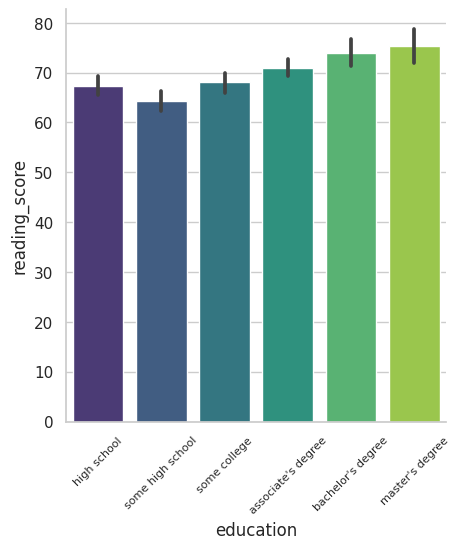

In [ ]:
sns.catplot(data=df,x="education",y="reading_score",kind="bar",palette="viridis")
plt.xticks(rotation=45, fontsize=8)

# Médias por raça/etnia

O grupo E apresenta a melhor média em relação aos exames de matemática.

Os grupos B e C tem as menores médias em relação aos demais.

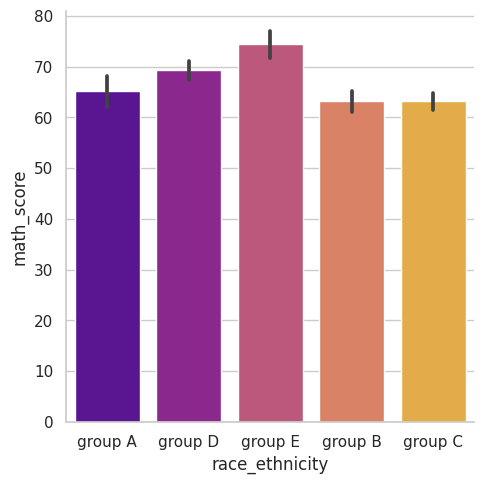

In [ ]:
sns.catplot(data=df,x="race_ethnicity",y="math_score",kind="bar",palette="plasma")

# Médias por gênero¶


Pessoas do sexo masculino tem melhor desempenho em exames de matemática.

Pessoas do sexo feminino tem melhor desempenho em exames de leitura.

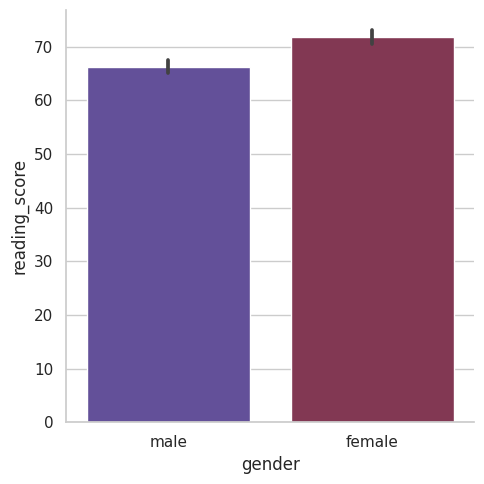

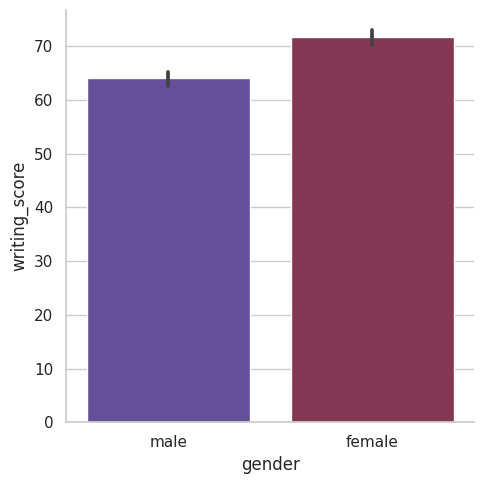

In [ ]:
sns.catplot(data=df,x="gender",y="reading_score",kind="bar",palette="twilight")
sns.catplot(data=df,x="gender",y="writing_score",kind="bar",palette="twilight")

# Médias em relação ao teste de preparação de curso

Quem completou o teste teve médias maiores nos exames de matemática, escrita e leitura



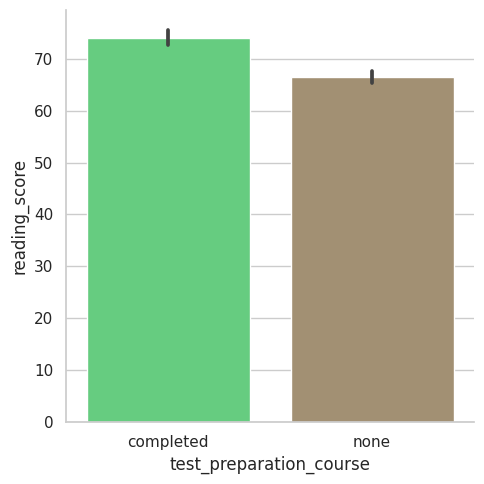

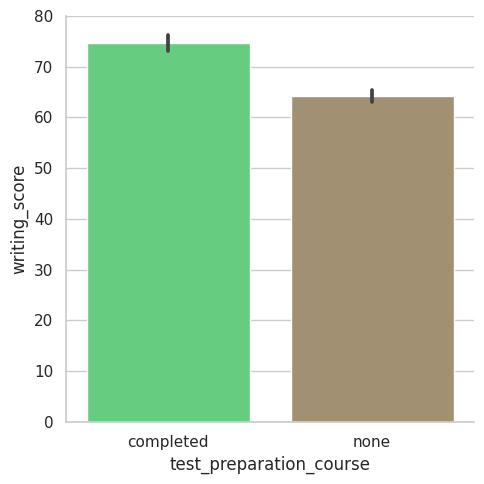

In [ ]:
sns.catplot(data=df,x="test_preparation_course",y="reading_score",kind="bar",palette="terrain")
sns.catplot(data=df,x="test_preparation_course",y="writing_score",kind="bar",palette="terrain")